<a href="https://colab.research.google.com/github/jumafernandez/UNLP/blob/master/TFI/TFI_experimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimentos TFI-UNLP

En esta notebook vamos a trabajar con experimentos para el TFI de la Especialización en Inteligencia de Datos con Orientación en Big Data de la Universidad Nacional de La Plata.

Para ello vamos a preprocesar los correos y aplicar tres modelos:
- Bayes,
- Máquina Vector-Soporte,
- Regresión Logística,
- Árboles de clasificación (bonus track).

Incorporamos el archivo al Collab:

In [0]:
# Descargo el archivo con las consultas que está en Github

!wget https://raw.githubusercontent.com/jumafernandez/UNLP/master/TFI/data/Correos_Seleccionados_y_Etiquetados.csv

--2019-12-31 15:10:56--  https://raw.githubusercontent.com/jumafernandez/UNLP/master/TFI/data/Correos_Seleccionados_y_Etiquetados.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 448336 (438K) [text/plain]
Saving to: ‘Correos_Seleccionados_y_Etiquetados.csv.19’

Correos_Seleccionad 100%[===================>] 437.83K  --.-KB/s    in 0.06s   

2019-12-31 15:10:56 (7.00 MB/s) - ‘Correos_Seleccionados_y_Etiquetados.csv.19’ saved [448336/448336]



In [0]:
# Leo el archivo en un dataframe
import pandas as pd

df = pd.read_csv('Correos_Seleccionados_y_Etiquetados.csv', delimiter="|")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Fecha                1000 non-null object
Hora                 1000 non-null object
Apellido y Nombre    1000 non-null object
Legajo               691 non-null object
Documento            1000 non-null int64
Carrera              1000 non-null object
Teléfono             851 non-null object
E-mail               1000 non-null object
Consulta             1000 non-null object
Respuesta            1000 non-null object
Clase                1000 non-null object
dtypes: int64(1), object(10)
memory usage: 86.1+ KB


In [0]:
# Vemos la cantidad de Instancias por clase

df.Clase.value_counts()

Boleto Universitario                   240
Ingreso a la Universidad               232
Requisitos de Ingreso                  129
Pedido de Certificados                  69
Inscripción a Cursadas                  64
Problemas con la Clave                  51
Reincorporación                         47
Cursadas                                23
Exámenes                                19
Carga de Notas                          17
Consulta por Legajo                     16
Cambio de Carrera                       14
Consulta por Equivalencias              14
Situación Académica                     12
Cambio de Comisión                      11
Vacunas Enfermería                      10
Consulta sobre Título Universitario     10
Datos Personales                        10
Certificados Web                         6
Simultaneidad de Carreras                6
Name: Clase, dtype: int64

In [0]:
# Transformamos todas las Clases minoritarias (Puedo ir variando la cantidad de clases que derivo a la Clase "Otras Consultas")
cantidad_clases=3

clases = df.Clase.value_counts()
clases_minoritarias = clases.iloc[cantidad_clases:].keys().to_list()

df.Clase[df['Clase'].isin(clases_minoritarias)] = "Otras Consultas"

df.Clase.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Otras Consultas             399
Boleto Universitario        240
Ingreso a la Universidad    232
Requisitos de Ingreso       129
Name: Clase, dtype: int64

In [0]:
# Preparo stopwords, aplico stemming y lemmatization
!pip install es-lemmatizer
!python -m spacy download es

from es_lemmatizer import lemmatize

import nltk
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(SnowballStemmer('spanish').stem(item))
    return stems

# We are going to create a document-term matrix using CountVectorizer, and exclude common Spanish stop words
from nltk.corpus import stopwords 

stop_words_es = set(stopwords.words('spanish')) 

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/es_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/es
You can now load the model via spacy.load('es')
ERROR: Could not find a version that satisfies the requirement spacy.es (from versions: none)
ERROR: No matching distribution found for spacy.es
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
# Trabajo sobre la representación de los documentos 
# (columna Consulta donde están las consultas de los estudiantes)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Representacion con pesado binario
representacion = CountVectorizer(tokenizer=tokenize, binary=True, strip_accents='unicode', stop_words=stop_words_es, analyzer='char', ngram_range=(6, 7))
# representacion = CountVectorizer(binary=True, strip_accents='unicode', stop_words=stop_words_es, max_features=2000)
# representacion = CountVectorizer(tokenizer=tokenize, binary=True, strip_accents='unicode', stop_words=stop_words_es, max_features=2000)

# Representacion con pesado TF-IDF
# representacion = TfidfVectorizer(use_idf=True, strip_accents='unicode', stop_words=stop_words_es, analyzer='char', ngram_range=(7, 7))
# representacion = TfidfVectorizer(use_idf=True, strip_accents='unicode', stop_words=stop_words_es)
# representacion = TfidfVectorizer(use_idf=True, strip_accents='unicode', stop_words=stop_words_es)

features = representacion.fit_transform(df.Consulta)

representacion.vocabulary_

{'hola q': 40441,
 'ola qu': 61406,
 'la qui': 48698,
 'a quie': 14067,
 ' quier': 6626,
 'quiero': 66129,
 'uiero ': 82061,
 'iero a': 43655,
 'ero an': 36217,
 'ro ano': 70812,
 'o anot': 58853,
 ' anota': 1349,
 'anotar': 18174,
 'notarm': 57527,
 'otarme': 64036,
 'tarme ': 77667,
 'arme a': 19487,
 'rme a ': 70551,
 'me a l': 51945,
 'e a la': 29025,
 ' a las': 832,
 'a las ': 13581,
 ' las m': 4559,
 'las ma': 49191,
 'as mat': 19946,
 's mate': 72615,
 ' mater': 5038,
 'materi': 51826,
 'ateria': 20673,
 'terias': 78515,
 'erias ': 36026,
 'rias ,': 69871,
 'ias ,p': 42047,
 'as ,pa': 19728,
 's ,par': 71937,
 ' ,para': 211,
 ',para ': 9605,
 'para e': 64443,
 'ara el': 18894,
 'ra el ': 67537,
 'a el s': 13201,
 ' el se': 3057,
 'el seg': 33330,
 'l segu': 47997,
 ' segun': 7037,
 'segund': 74526,
 'egundo': 32879,
 'gundo ': 39854,
 'undo c': 82810,
 'ndo cu': 56049,
 'do cua': 28153,
 'o cuat': 58986,
 ' cuatr': 1991,
 'cuatri': 25152,
 'uatri ': 80515,
 'atri ,': 20781,
 'tr

In [0]:
# Incorporo al dataframe original las features del TF-IDF Vectorizer

df1 = pd.DataFrame(features.toarray(), columns=representacion.get_feature_names())
df = df.iloc[:,10:]
df = pd.concat([df, df1], axis=1)

In [0]:
# Separo en features y clase los atributos del DataFrame

# Features
feature_names = list(df.columns)
# Elimino type porque es la clase
feature_names.remove('Clase')
x = df[feature_names]

# Class
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(df['Clase'])
target_names=le.classes_

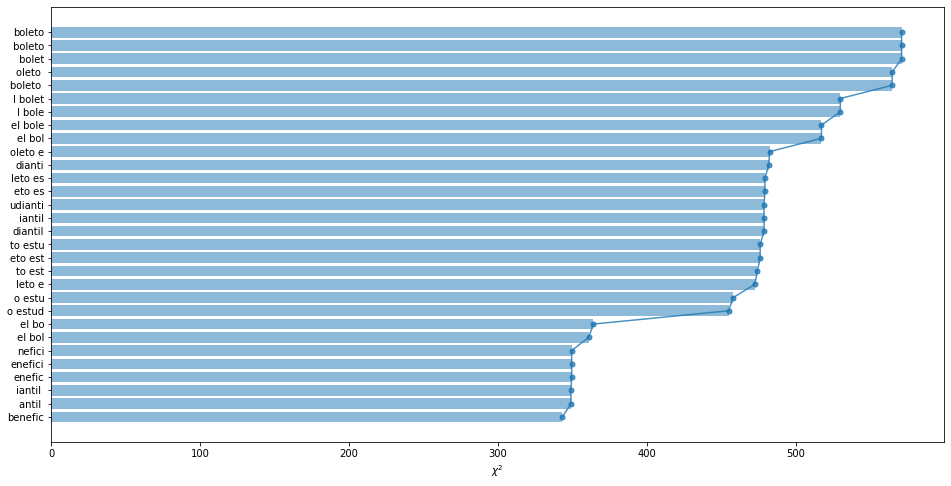

In [0]:
# Analizo cuales son las features mas importantes según chi2

from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
%matplotlib inline

chi2score = chi2(x, y)[0]

plt.figure(figsize=(16,8))

scores = list(zip(representacion.get_feature_names(), chi2score))

chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-30:]))
x_chi = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x_chi, topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x_chi, '-o', markersize=5, alpha=0.8)
plt.yticks(x_chi, labels)
plt.xlabel('$\chi^2$')
plt.show();

In [0]:
# Separo datos de entrenamiento y testing

from sklearn.model_selection import train_test_split

# Separo en 70-30 entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)


## Naive Bayes

Aquí probamos con Naive Bayes (Usamos ComplementNB que posee optimizaciones para datasets desbalanceados):

In [0]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

modelo_bayes = ComplementNB()

modelo_bayes.fit(x_train, y_train)

# Realizo la predicción de y con el x_test
y_pred = modelo_bayes.predict(x_test)

In [0]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


## Máquina Vector-Soporte (SVM):

Ahora corremos el segundo modelo:

In [0]:
from sklearn.svm import LinearSVC

modelo_svc = LinearSVC()
modelo_svc.fit(x_train, y_train)

# Realizo la predicción de y con el x_test
y_pred = modelo_svc.predict(x_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.82


## Regresión Logística

Aquí corremos el tercer modelo:

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

modelo_regresion = LogisticRegression()
modelo_regresion.fit(x_train, y_train)

# Realizo la predicción de y con el x_test
y_pred = modelo_regresion.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8533333333333334


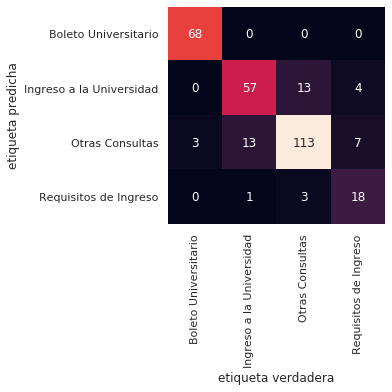

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('etiqueta verdadera')
plt.ylabel('etiqueta predicha');

## Árboles de clasificación (Bonus track)

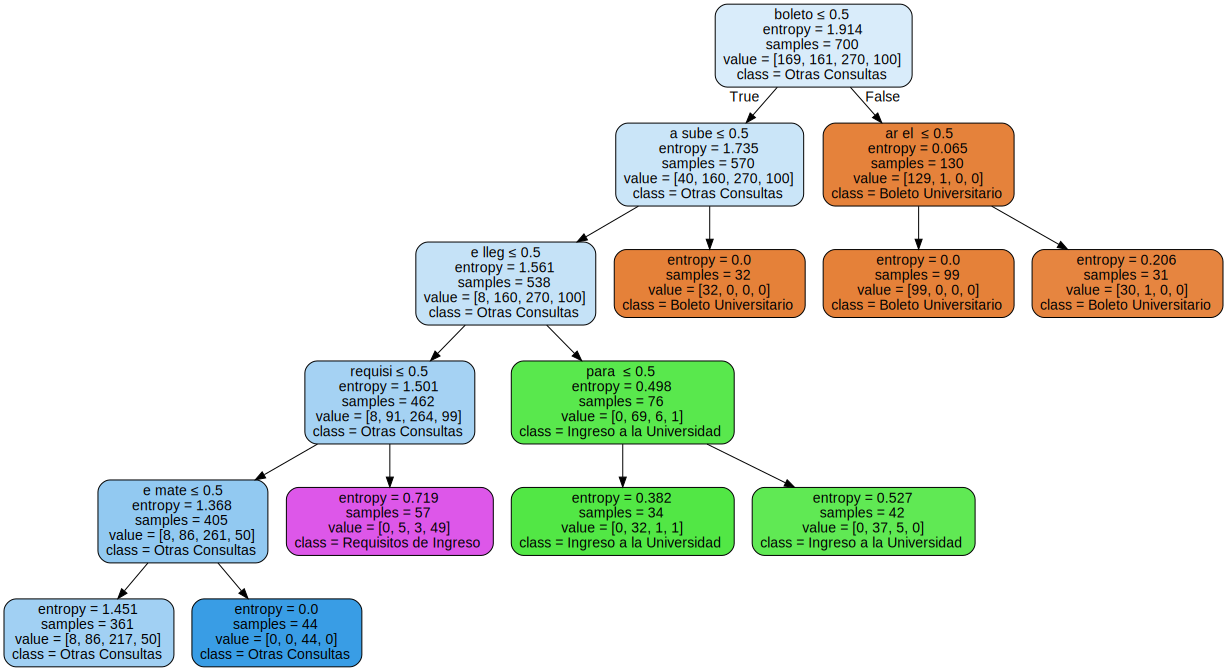

<Figure size 1152x576 with 0 Axes>

In [0]:
from sklearn import tree

arbol = tree.DecisionTreeClassifier(criterion='entropy',  max_depth=5, min_samples_leaf=30)

arbol = arbol.fit(x_train, y_train)

#Importamos la librería
import graphviz

plt.figure(figsize=(16,8))

dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                label='all',
                                filled=True, rounded=True,
                                special_characters=True)

# Capturo el source
graph = graphviz.Source(dot_data)

# Muestro el contenido de graph
graph

In [0]:
#Predict the response for test dataset
y_pred = arbol.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7866666666666666


# LSTM (en desarrollo)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
